In [8]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img

try:

    # Define data augmentation parameters
    datagen = ImageDataGenerator(
            rotation_range=20, # randomly rotate images within 20 degrees
            width_shift_range=0.2, # randomly shift images horizontally by 20% of the width
            height_shift_range=0.2, # randomly shift images vertically by 20% of the height
            shear_range=0.2, # randomly apply shearing transformations
            zoom_range=0.2, # randomly zoom images
            horizontal_flip=True, # randomly flip images horizontally
            fill_mode='nearest') # fill in any empty pixels with the nearest value

    # Specify the directory containing the images to be augmented
    input_dir = '/kaggle/input/car-damage-severity-dataset/data3a/training/03-severe'
    output_dir = "/kaggle/working/03-severe"
    # Loop through each image in the directory and apply data augmentation
    for filename in os.listdir(input_dir):
        img = load_img(os.path.join(input_dir, filename))  # Load the image
        x = img_to_array(img)  # Convert the image to a numpy array
        x = x.reshape((1,) + x.shape)  # Reshape the array to (1, height, width, channels)

        # Generate batches of augmented images and save them to the output directory
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='aug_', save_format='jpeg'):
            i += 1
            if i >= 28:  # Generate 5 augmented images for each input image
                break


except Exception as e:
    print(e)


In [7]:
import os
os.makedirs('/kaggle/working/03-severe')

In [ ]:
os.

In [15]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
print(os.listdir("/kaggle/working/"))


['02-moderate', '01-minor', '03-severe']


In [14]:
import shutil
os.remove("/kaggle/working/__notebook_source__.ipynb")

In [16]:
train_car_images = []
train_car_labels = [] 
for directory_path in glob.glob("/kaggle/working/*"):
    car_label = directory_path.split("\\")[-1]
    print(car_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):       
            img = cv2.imread(img_path, cv2.IMREAD_COLOR) 
            if img is None:
                print('Wrong path:', img_path)
            else:
                img = cv2.resize(img, (128, 128))
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
                train_car_images.append(img)
                train_car_labels.append(car_label)
train_car_images = np.array(train_car_images)
train_car_labels = np.array(train_car_labels)

/kaggle/working/02-moderate
/kaggle/working/01-minor
/kaggle/working/03-severe


In [17]:
train_car_images.shape, train_car_labels.shape

((21055, 128, 128, 3), (21055,))

In [18]:
# Get the unique class values and their counts from y_train_subset
unique_classes, class_counts = np.unique(train_car_labels, return_counts=True)

for i in range(len(unique_classes)):
    print("Class {}: {} samples".format(unique_classes[i], class_counts[i]))

Class /kaggle/working/01-minor: 6799 samples
Class /kaggle/working/02-moderate: 6906 samples
Class /kaggle/working/03-severe: 7350 samples


In [19]:
label_to_id = {v:i for i,v in enumerate(np.unique(train_car_labels))}
id_to_label = {v: k for k, v in label_to_id.items()}
train_label_ids = np.array([label_to_id[x] for x in train_car_labels])


In [20]:
train_label_ids.shape

(21055,)

In [21]:
label_to_id

{'/kaggle/working/01-minor': 0,
 '/kaggle/working/02-moderate': 1,
 '/kaggle/working/03-severe': 2}

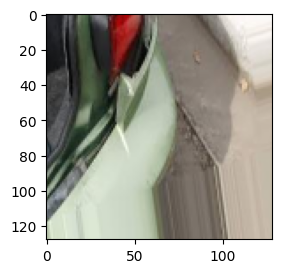

In [22]:
plt.subplot(121)
img = np.reshape(train_car_images[5], (128,128,3))
plt.imshow(img)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train_car_images, train_label_ids, test_size=0.3, random_state=42)


In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14738, 128, 128, 3), (6317, 128, 128, 3), (14738,), (6317,))

In [25]:
# Save the augmented data to files
np.savez_compressed('/kaggle/working/Car_damage_aug_dataset_final_1.npz',
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test)